# Rutwick Bhawsar | Shivang Arya
## Business Data Science, Fall 2019
### Homework 3

In [218]:
### First importing all the files

from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

## Problem 1. Question 2 
To find the test error of the zero-variance solution and compare it with the OLS test error. 

In [219]:
### Generating X_train, X_test, y and y_test
### Initially we let beta = [1,1,1,1,0] for the OLS Regression model and check it the test error.

p = 5; n = 500
X = np.random.randn(n,p)
c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
# c is a column that is approximately a linear combination of
# columns 1, 2, 3 and 4. We set the 5th column of X equal to c
X[:,p-1] = c
beta = np.array([1,1,1,1,0])
sigma = 0.3333
y = np.dot(X,beta) + sigma*np.random.randn(n)
# Now let's also generate a test data set
n1 = 500 # number of testing points
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)

In [235]:
### Checking the estimated beta

Z = np.dot(X.T,X)
beta_hat = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
print("The OLS beta_hat is: ",beta_hat)

### Checking the test error for OLS Regression

test_error= np.linalg.norm(np.dot(X_test,beta_hat) - y_test)
print("The OLS Test Error is: ", test_error)

The OLS beta_hat is:  [14.71461074 21.56757937 -5.86385022  4.40344794 -6.85305127]
The OLS Test Error is:  153.14638984107748


In [236]:
### Checking the test error for the zero-variance solution

beta_hat1=np.array([0,0,0,0,0])
test_error2 = np.linalg.norm(np.dot(X_test,beta_hat1) - y_test)
print("The Zero Variance Test Error is: ", test_error2)

The Zero Variance Test Error is:  48.53165110641193


In [237]:
test_error3 = np.linalg.norm(np.dot(X_test,beta) - y_test)
print("The true error is: ", test_error3)

The true error is:  7.018401467187469


As we can see the zero-variance solution gives a lower test error than the OLS Regression.

## Problem 1. Question 2

In [265]:
beta_hat=np.array([0,0,0,0,0])
averages=np.array([0,0,0,0,0])

### Generating many copies of the data and running OLS on them. 
### Each time averaging the beta_hat value. 

for i in range(1000):
    p = 5; n = 500
    X = np.random.randn(n,p)
    c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
    # c is a column that is approximately a linear combination of
    # columns 1, 2, 3 and 4. We set the 5th column of X equal to c
    X[:,p-1] = c
    beta = np.array([1,1,1,1,0])
    sigma = 0.3333
    y = np.dot(X,beta) + sigma*np.random.randn(n)
    # Now let's also generate a test data set
    n1 = 500 # number of testing points
    X_test = np.random.randn(n1,p)
    c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
    X_test[:,p-1] = c_test
    y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)\
    
    # Z is the XX'
    Z = np.dot(X.T,X)

    ### Here we obtain the beta_hat value
    ### We are averaging the values each time we get a beta_hat for a new copy of the data
    
    beta_hat1 = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)
    beta_hat=np.vstack((beta_hat,beta_hat1))
    averages=np.vstack((averages,np.mean(beta_hat,axis=0)))
    

In [266]:
averages=averages[1:,]
beta_hat=beta_hat[1:,]

As you can see, each run produces a beta hat that is very different


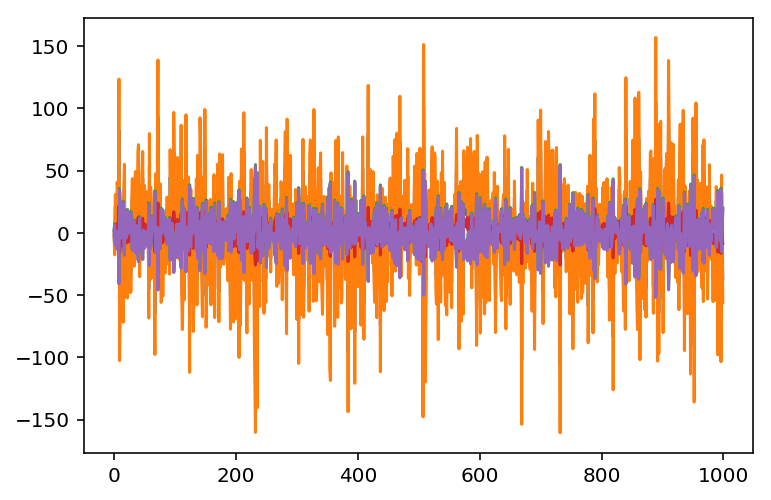

In [267]:
plt.plot(beta_hat[:,0])
plt.plot(beta_hat[:,1])
plt.plot(beta_hat[:,2])
plt.plot(beta_hat[:,3])
plt.plot(beta_hat[:,4])
print("As you can see, each run produces a beta hat that is very different")

Their average begins to look more and more like the true beta


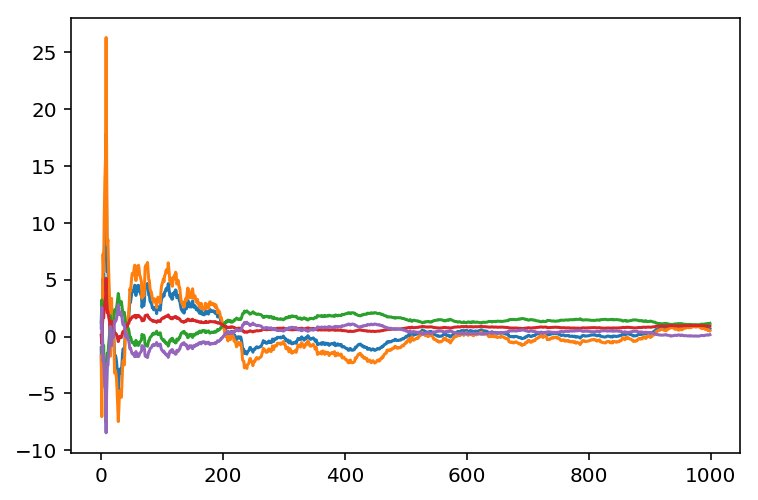

In [268]:
plt.plot(averages[:,0])
plt.plot(averages[:,1])
plt.plot(averages[:,2])
plt.plot(averages[:,3])
plt.plot(averages[:,4])
print("Their average begins to look more and more like the true beta")

## Problem 1. Question 4

In [269]:
### From the previous Question we can see that the final average of the beta_hat converges towards to true beta
averages[-1:,:]

array([[0.67144925, 0.50791004, 1.16283677, 0.91650524, 0.1638268 ]])

In [272]:
### Instead of small batches we compute the beta_hat by running a single OLS Regression on the dataset

### We created a large dataset of 500000 rows. This is equivalent to the final number of rows in the previous question.

p = 5; n = 500000
X = np.random.randn(n,p)
c = np.dot(X[:,0:p-1],[2,3,-1,0.5]) + np.random.randn(1,n)/1000;
# c is a column that is approximately a linear combination of
# columns 1, 2, 3 and 4. We set the 5th column of X equal to c
X[:,p-1] = c
beta = np.array([1,1,1,1,0])
sigma = 0.3333
y = np.dot(X,beta) + sigma*np.random.randn(n)
# Now let's also generate a test data set
n1 = 500 # number of testing points
X_test = np.random.randn(n1,p)
c_test = np.dot(X_test[:,0:p-1],[2,3,0,0.5]) + np.random.randn(1,n1)/1000;
X_test[:,p-1] = c_test
y_test = np.dot(X_test,beta) + sigma*np.random.randn(n1)\
# Z is the XX'
Z = np.dot(X.T,X)

beta_hat1 = np.dot(np.dot(np.linalg.inv(Z),X.T),y.T)

print("The beta_hat by taking average of small batches: ",averages[-1:,:])
print("The beta_hat by running a single OLS Regression",beta_hat1)
print("The original beta: ", beta)

The beta_hat by taking average of small batches:  [[0.67144925 0.50791004 1.16283677 0.91650524 0.1638268 ]]
The beta_hat by running a single OLS Regression [ 1.53004185  1.79433774  0.73448809  1.13200632 -0.26454585]
The original beta:  [1 1 1 1 0]


## Problem 2
Data Preprocessing

In [278]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [279]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [280]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BB8E699B0>,
      dtype=object)

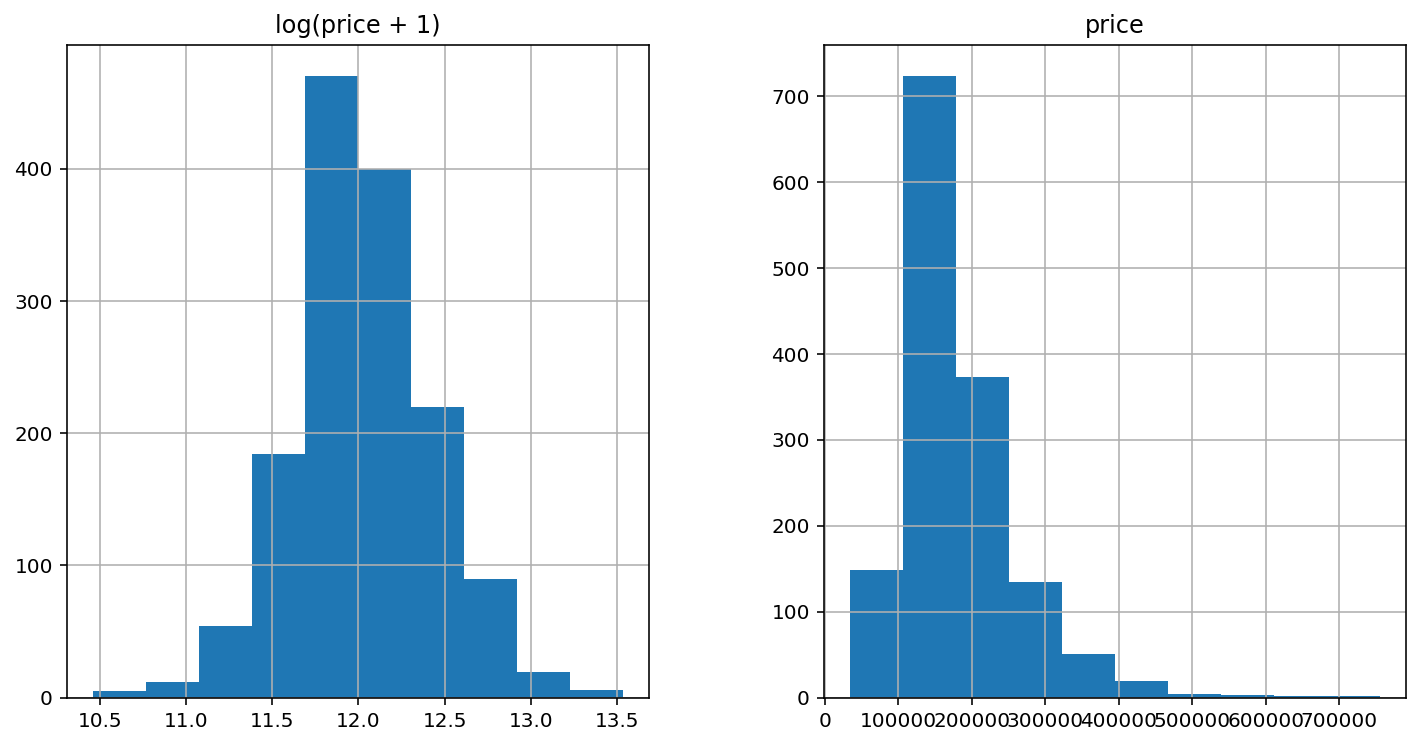

In [281]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [282]:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.


In [284]:
### Replacing words with numeric values for the purpose of regression
### Also replacing the NaN values with the means of the columns.

all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

In [285]:
### Dividing between training and testing data

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

## Problem 2. Question 3

In [86]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import linear_model

### Ridge Regression. 

clf = Ridge(alpha=0.1)
clf.fit(X_train, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
pred = clf.predict(X_test)
pred

array([11.70783814, 11.98066966, 12.14367438, ..., 12.08257596,
       11.70858722, 12.29762649])

In [27]:
pred = np.expm1(pred)

In [28]:
np.savetxt("foo.csv", pred, delimiter=",")

#### After submission our RMSE score was: 0.13029

## Problem 2. Part 3

In [45]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 15))
    return(rmse)

In [46]:
model_ridge = Ridge()

Text(0, 0.5, 'rmse')

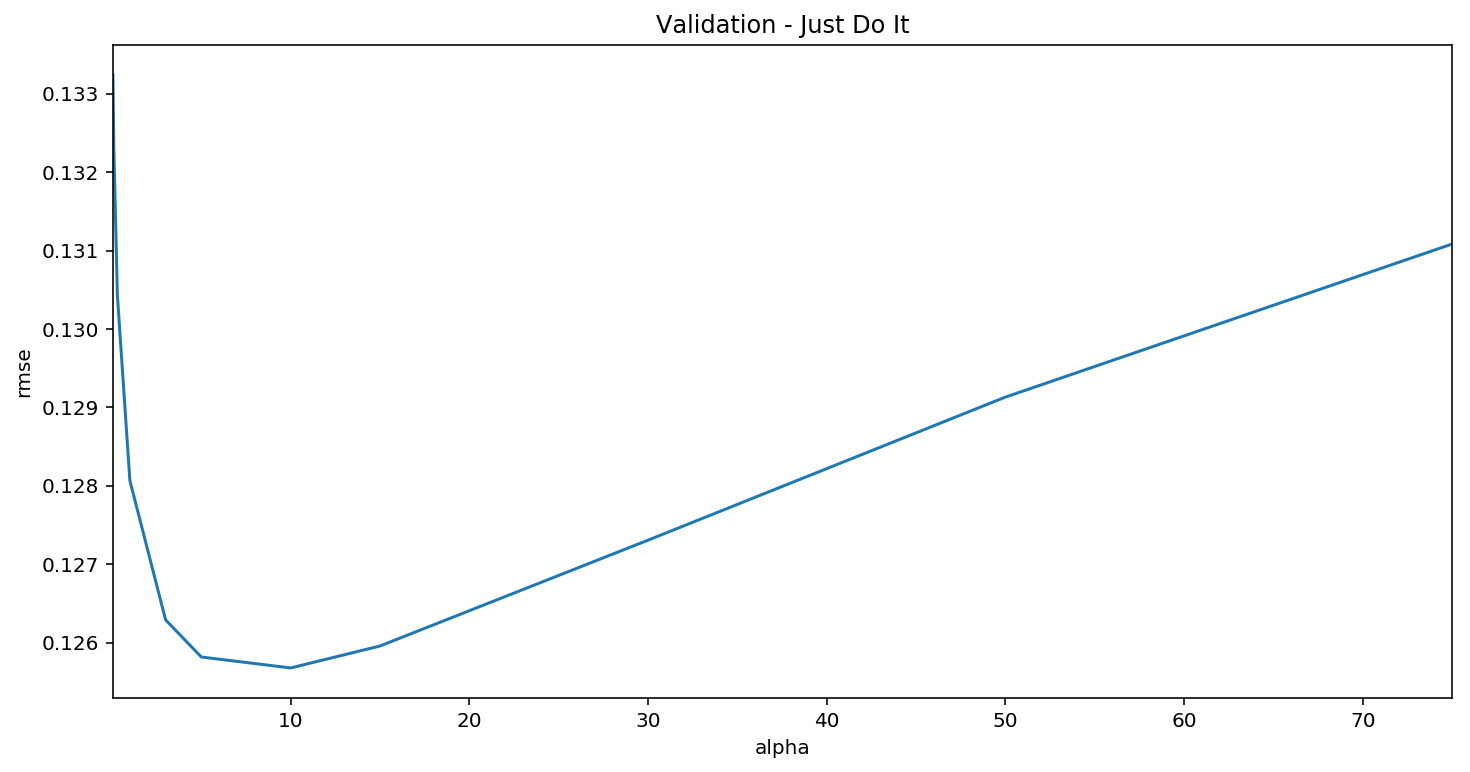

In [47]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [58]:
cv_ridge.min()

0.12567856890237125

In [ ]:
### From the graph we see that the alpha for which the RMSE is lowest is 10.

In [133]:
clf = Ridge(alpha=10)
clf.fit(X_train, y)
pred = clf.predict(X_test)
pred

array([11.68713201, 11.93842702, 12.10631979, ..., 12.05320284,
       11.67259026, 12.3217596 ])

In [134]:
pred = np.expm1(pred)
np.savetxt("foo.csv", pred, delimiter=",")

#### The best possible single Ridge Regression RMSE is : 0.12224 for alpha = 10

In [286]:
### Lasso Regression

model_lasso = LassoCV(alphas = [0.1],cv = 15).fit(X_train, y)

In [287]:
rmse_cv(model_lasso)

array([0.1956529 , 0.21003679, 0.17604476, 0.19847658, 0.22339077,
       0.22441119, 0.21283189, 0.21543339, 0.1839921 , 0.23242293,
       0.20912844, 0.16578118, 0.22496758, 0.24428333, 0.20407436])

In [288]:
lasso = Lasso()
param = {'alpha': [1e-3,1e-2,1e-1,1,5,10,20,100]}

In [289]:
LR = GridSearchCV(lasso,param,scoring='neg_mean_squared_error',cv=10)
LR.fit(X_train,y)
print("The alpha for the least RMSE is: ",LR.best_params_)
print("The least training RMSE is: ",LR.best_score_)

The alpha for the least RMSE is:  {'alpha': 0.001}
The least training RMSE is:  -0.015754816874595116


In [127]:
clf2 = linear_model.Lasso(alpha=0.001)
clf2.fit(X_train,y)

In [129]:
predlas = clf2.predict(X_test)
predlas = np.expm1(predlas)
predlas

In [132]:
np.savetxt("foola.csv", predlas, delimiter=",")

#### The best possible single Lasso Regression RMSE is : 0.12238 for alpha  = 0.001

Therefore we conclude that with the best alphas, Single Ridge Regression model is better for our dataset compared to the Single Lasso Regression model.


## Problem 2. Question 4

Lasso picked 1 eliminated the other 287
Lasso picked 1 eliminated the other 287
Lasso picked 3 eliminated the other 285
Lasso picked 3 eliminated the other 285
Lasso picked 3 eliminated the other 285
Lasso picked 5 eliminated the other 283
Lasso picked 8 eliminated the other 280
Lasso picked 17 eliminated the other 271
Lasso picked 30 eliminated the other 258
Lasso picked 79 eliminated the other 209
Lasso picked 110 eliminated the other 178


C:\Users\rutwi\Anaconda_3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso picked 192 eliminated the other 96
Lasso picked 221 eliminated the other 67


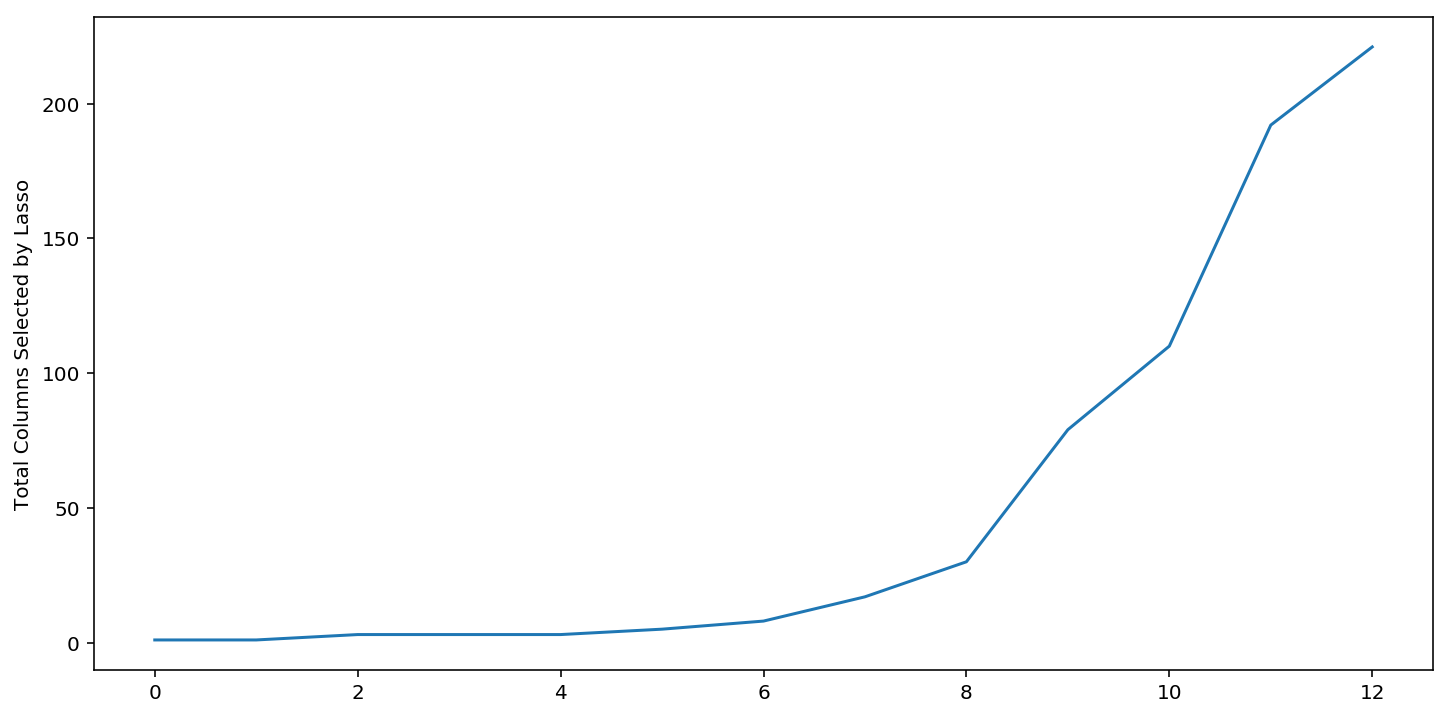

In [155]:
alphas = [10,5,2,1,0.5,0.2,0.1, 0.01,0.005, 0.001, 0.0005,0.0001,0.00005]
pick=np.array([])
for i in alphas:
    clf2 = linear_model.Lasso(alpha=i).fit(X_train,y)
    coef = pd.Series(clf2.coef_, index = X_train.columns)
    print("Lasso picked " + str(sum(coef != 0)) + " eliminated the other " +  str(sum(coef == 0)))
    pick=np.append(pick,int(sum(coef != 0)))
plt.plot(pick)
plt.ylabel('Total Columns Selected by Lasso')
plt.show()


## Problem 2. Question 5


In [290]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

Output of Lasso added to the dataset and then performed ridge regression on it. 

In [201]:
clf2 = linear_model.Lasso(alpha=0.001)
clf2.fit(X_train,y)
predlastrain = clf2.predict(X_train)
predlastest = clf2.predict(X_test)
X_train['LassoOutput'] = predlastrain
X_test['LassoOutput'] = predlastest

C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'rmse')

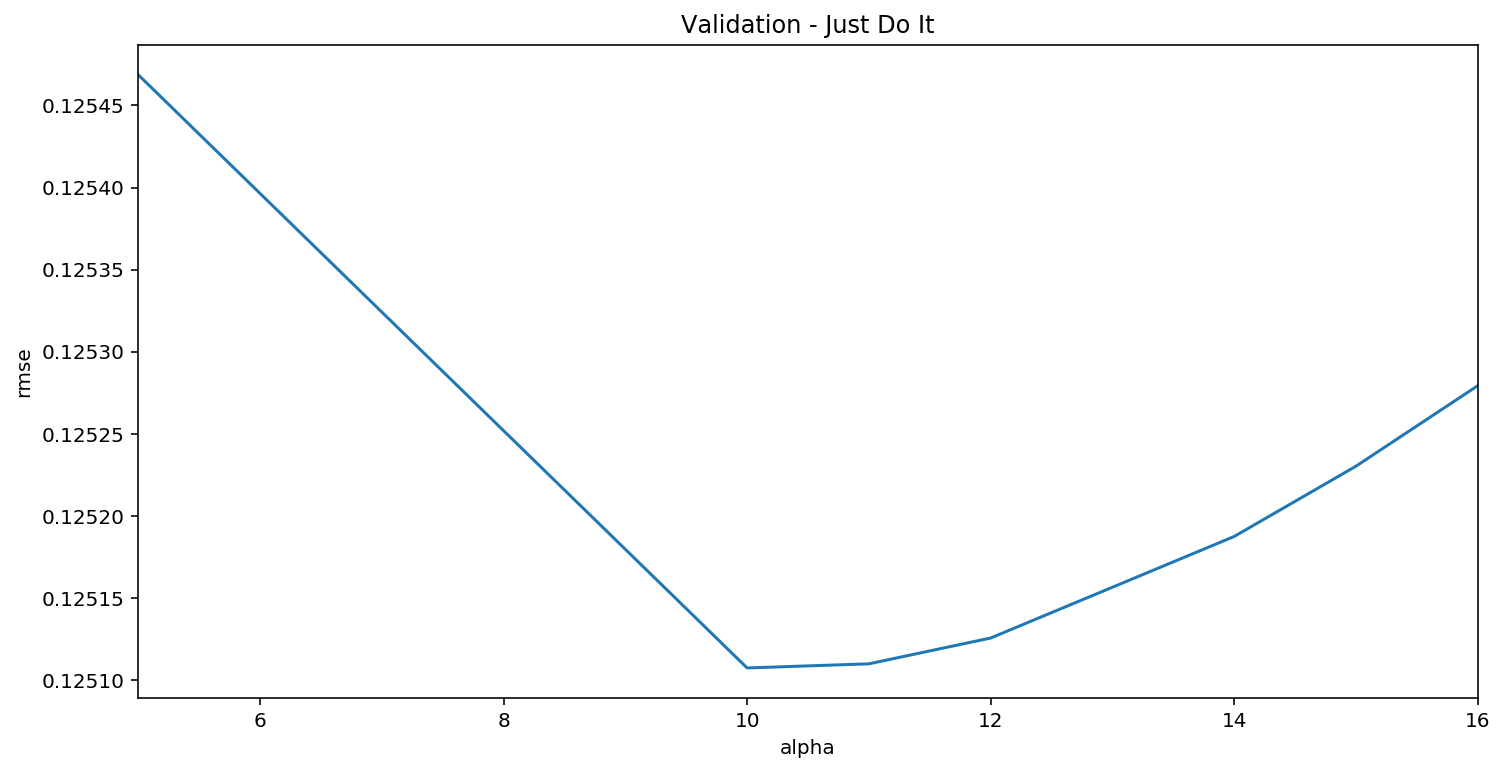

In [202]:
alphas = [5, 10,11,12,14, 15,16]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [176]:
clf = Ridge(alpha=10)
clf.fit(X_train, y)
pred = clf.predict(X_test)
pred = np.expm1(pred)
np.savetxt("lassoridge.csv", pred, delimiter=",")

In [206]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

The best test RMSE is 0.12197 for Lasso Output added to DataSet. 

#### Output of Ridge added to the dataset and then performed ridge regression on it. 

In [207]:
clf = Ridge(alpha=10)
clf.fit(X_train, y)
predridtrain = clf.predict(X_train)
predridtest = clf.predict(X_test)

X_train['LassoOutput'] = predridtrain
X_test['LassoOutput'] = predridtest

C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0, 0.5, 'rmse')

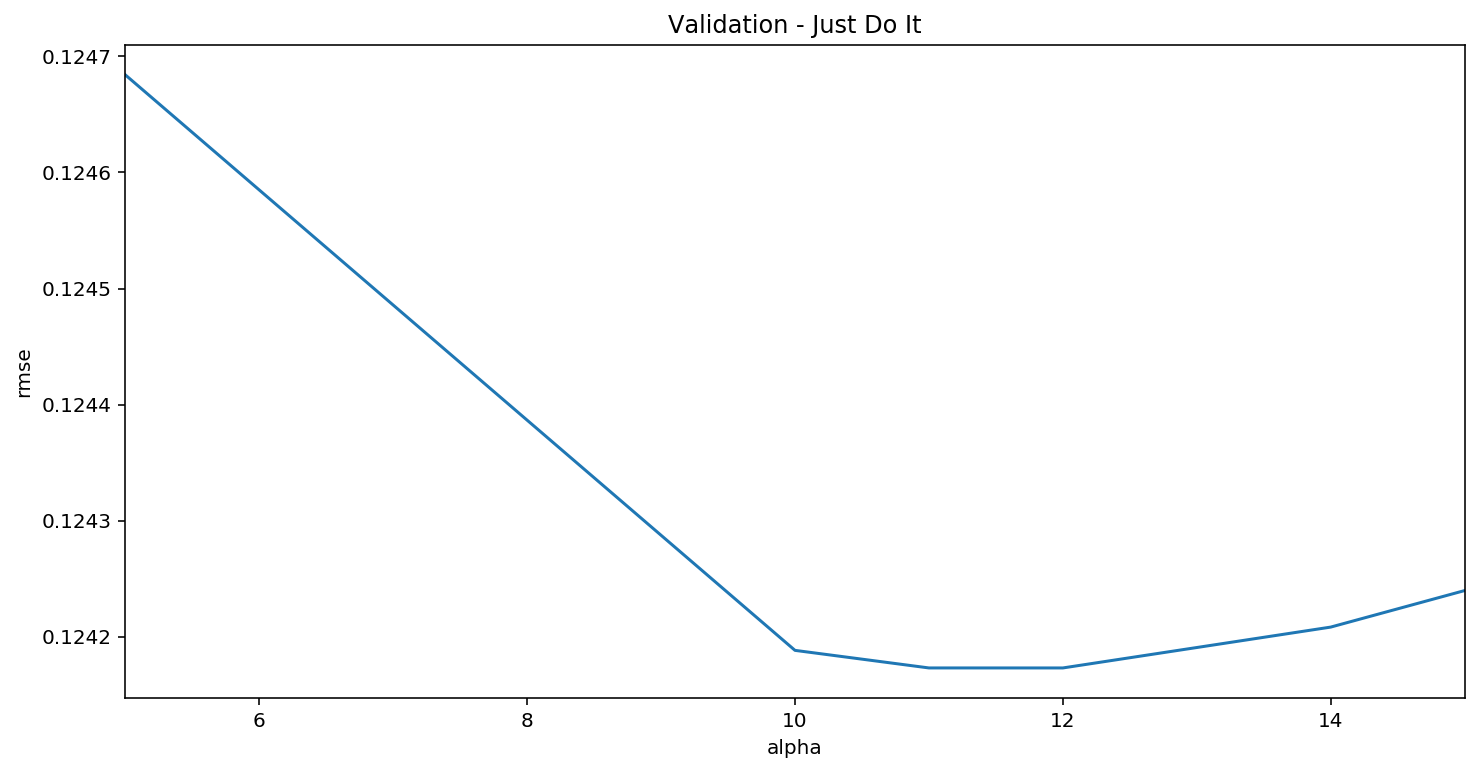

In [208]:
alphas = [ 5,10, 11,12, 14,15]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [210]:
clf = Ridge(alpha=12)
clf.fit(X_train, y)
predridge = clf.predict(X_test)
predridge = np.expm1(predridge)
np.savetxt("ridgeridge.csv", predridge, delimiter=",")

The best test RMSE is 0.12233 for Ridge Output added to DataSet 

#### Output of Lasso and Ridge regression being added to dataset. 

In [211]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [212]:
### Performing Ridge on the Dataset
clf = Ridge(alpha=10)
clf.fit(X_train, y)
predridtrain = clf.predict(X_train)
predridtest = clf.predict(X_test)

### Performing Lasso on the Dataset
clf2 = linear_model.Lasso(alpha=0.001)
clf2.fit(X_train,y)
predlastrain = clf2.predict(X_train)
predlastest = clf2.predict(X_test)

In [213]:
X_train['LassoOutput'] = predlastrain
X_test['LassoOutput'] = predlastest
X_train['RidgeOutput'] = predridtrain
X_test['RidgeOutput'] = predridtest

C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rutwi\Anaconda_3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

Text(0, 0.5, 'rmse')

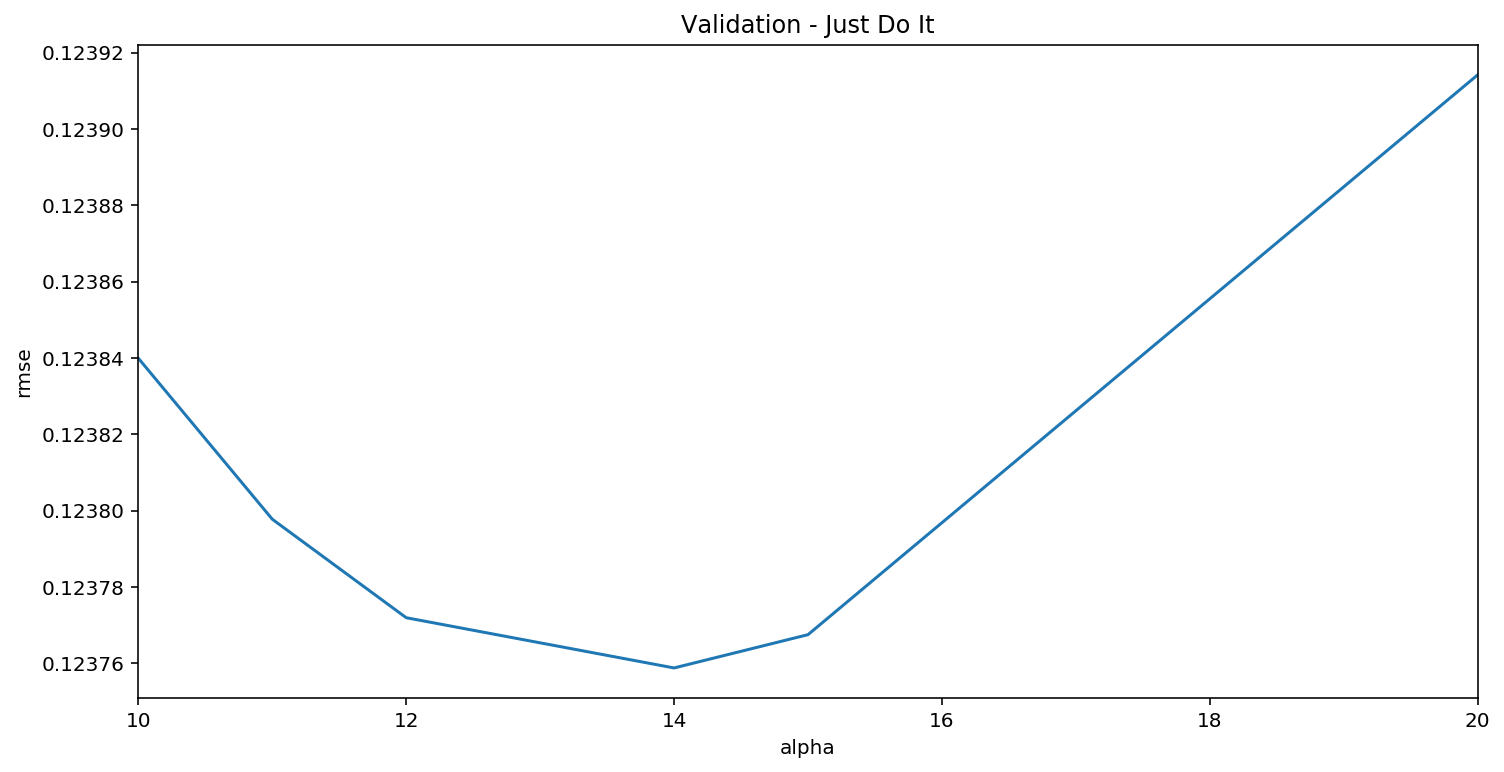

In [216]:
alphas = [10,11, 12, 14,15, 20]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [217]:
clf = Ridge(alpha=14)
clf.fit(X_train, y)
predridge = clf.predict(X_test)
predridge = np.expm1(predridge)
np.savetxt("lassoridgeridge.csv", predridge, delimiter=",")

The best test RMSE is 0.12191 for Lasso and Ridge Output added to DataSet 

## Problem 2. Question 9

We have created an account each on Kaggle and made submissions through both. These were our best scores. 

<img src="BestSubmission.png">